<h1 style='text-align: center; front-size: 50px;'>Does the weather impact the duration of rides?</h1>

# Introduction:

In this project, we will work with data from **'Zuber'**, a new ride-sharing company that's launching in Chicago. Our mission is to find patterns in the available information and try to understand passenger preferences and the impact of external factors on rides. We'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency. This will allow us to improve customer experiance and optimize scheduling and routing.The dataset is stored in two files (project_sql_result_01.csv), (project_sql_result_04.csv). During data preprocessing, we will:

- Load and display the dataset in a standardized format.
- Verify and correct data types.
- Identify and handle missing values.
- Detect and remove duplicate entries.
- Identify the top 10 neighborhoods in terms of drop-offs.
- Create visualizations to clearly communicate insights from the data.

By following this process, we aim to produce a detailed report that provides actionable insights for business strategy.

# Step 1. Initialization:

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 2. Load data:

In [2]:
# Loading the data files into different DataFrames:
company_name_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_avg_trip = pd.read_csv('/datasets/project_sql_result_04.csv')
weather_duration = pd.read_csv('/datasets/project_sql_result_07.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/project_sql_result_01.csv'

# Step 3. Preparing and Fixing the Data:

### Company_name_trips:

In [ ]:
# Printing the DataFrame:
company_name_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
# Data overview:
company_name_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
# Checking for missing values:
company_name_trips.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [ ]:
# Checking for duplicates:
company_name_trips.duplicated().sum()

0

### Dropoff_avg_trip:

In [ ]:
# Printing the DataFrame:
dropoff_avg_trip.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
# Data overview:
dropoff_avg_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
# Converting 'average_trips' into Integer:
dropoff_avg_trip['average_trips'] = dropoff_avg_trip['average_trips'].astype(int)

In [ ]:
# Checking for missing values:
dropoff_avg_trip.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [ ]:
# Checking for duplicates:
dropoff_avg_trip.duplicated().sum()

0

### Weather_duration:

In [ ]:
# Printing the DataFrame:
weather_duration.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
# Data overview:
weather_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [ ]:
# Checking for missing values:
weather_duration.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [ ]:
# Converting 'start_ts' into datetime:
weather_duration['start_ts'] = pd.to_datetime(weather_duration['start_ts'])

# Step 4. Analyzing the data:

In [ ]:
# Identifying the top 10 neighborhoods in terms of drop-offs:
top_10_neighborhoods = dropoff_avg_trip.sort_values(by='average_trips', ascending=False).reset_index(drop=True).head(10)
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


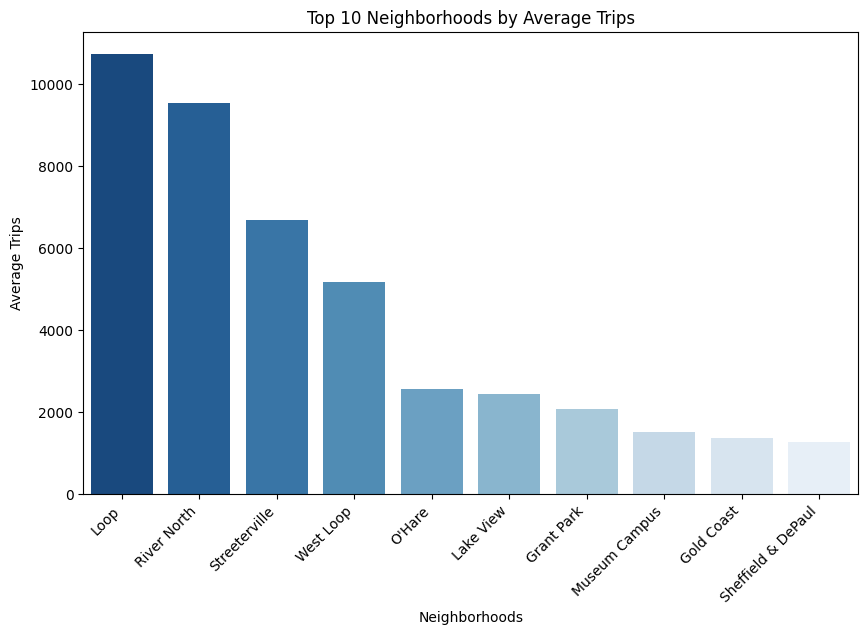

In [ ]:
# Barplot showing Top 10 Neighborhoods by Average Trips:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_neighborhoods, x='dropoff_location_name', y='average_trips', palette='Blues_r')
plt.title('Top 10 Neighborhoods by Average Trips')
plt.xlabel('Neighborhoods')
plt.ylabel('Average Trips')
plt.xticks(rotation=45, ha='right')
plt.show()

The graph shows that **The Loop** has the highest average trips, making it the primary transportation destination, followed by **River North** and **Streeterville**, likely due to entertainment activities. **O'Hare Airport** ranks high, indicating strong demand for airport transfers, while trip volume gradually declines across the rest of the destinations.  

In [ ]:
# Identifying the top 10 companies in terms of number of trips:
top_10_companies = company_name_trips.sort_values(by='trips_amount', ascending=False).reset_index(drop=True).head(10)
top_10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


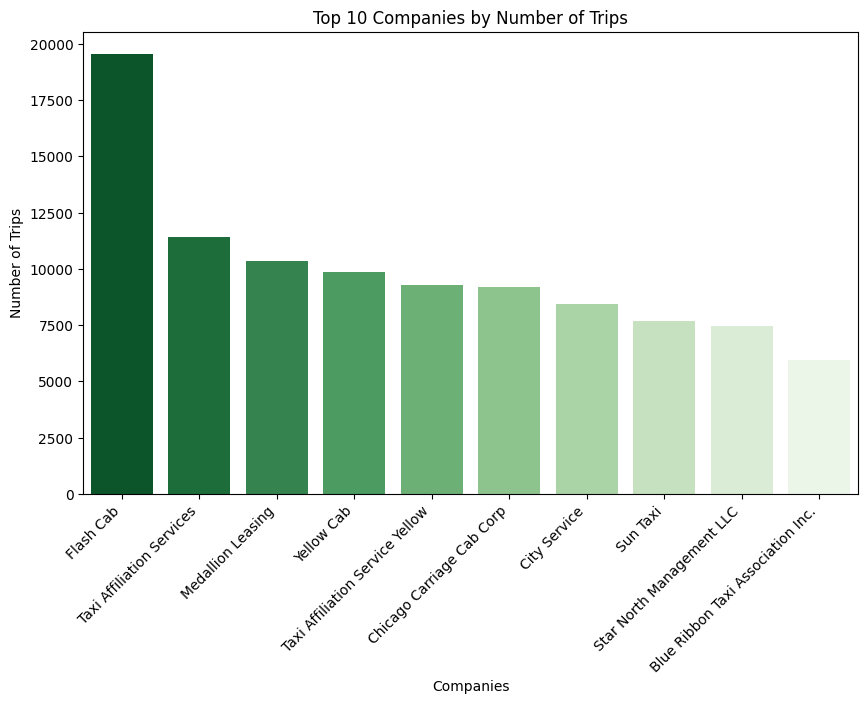

In [ ]:
# Barplot showing Top 10 Companies by Number of Trips:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_companies, x='company_name', y='trips_amount', palette='Greens_r')
plt.title('Top 10 Companies by Number of Trips')
plt.xlabel('Companies')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.show()

The graph shows that **Flash Cab** dominates the transportion market, handling far more trips than its competitors. The remaining companies have a gradual decline in trips volume. This indicates that the smaller companies can work on improving thier services or pricing to gain market share. Additionally, analyzing factors like customer satisfaction, or geographic coverage could explain why **Flash Cab** outperforms the others. 

# Step 5. Testing the hypotheses:


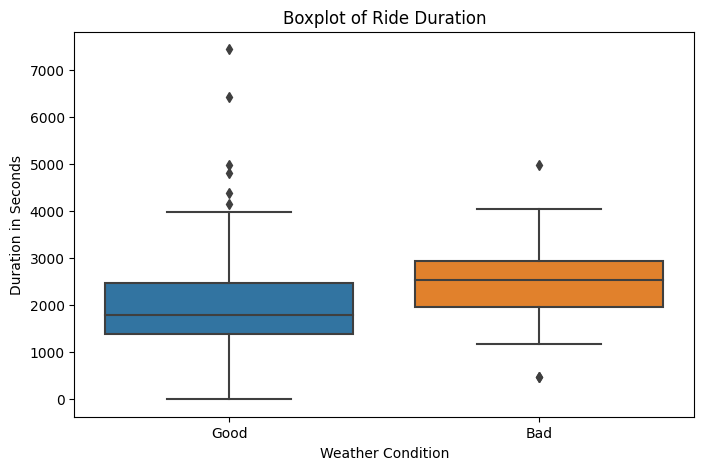

In [ ]:
# Createing the box plot:
plt.figure(figsize=(8,5))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=weather_duration)
plt.xlabel('Weather Condition')
plt.ylabel('Duration in Seconds')
plt.title('Boxplot of Ride Duration')
plt.show()

The Boxplot shows that rides durations tend to be longer in **Bad Weather**, with a higher median and greater variability, likely due to slower driving speeds and reduced visibility. However, **Good Weather** also shows more extreme ride durations, possibly due to increased demand and hifgher traffic volume. 

#Test the hypotheses:

- Null Hypothesis (H_0): Average duration of rides from the Loop to O'Hare International Airport doesn't changes on rainy Saturdays.

- Alternative Hypothesis (H_1): Average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [ ]:
# Extracting Good and Bad weather condition from the dataset:
bad_saturdays = weather_duration[weather_duration['weather_conditions'] == 'Bad']['duration_seconds']
good_saturdays = weather_duration[weather_duration['weather_conditions'] == 'Good']['duration_seconds']

# Conducting the t-test:
t_stat, p_value = stats.ttest_ind(bad_saturdays, good_saturdays, equal_var=False)

# Printing the results:
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: Average duration of rides changes on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average duration of rides on rainy Saturdays.")

T-statistic: 7.186034288068629, P-value: 6.738994326108734e-12
Reject the null hypothesis: Average duration of rides changes on rainy Saturdays.


Our analysis found a statistically significant difference in ride duration on rainy Saturdays (p-value ~ 0). This means that the rain significantly impacts travel time, likely due to factors such as traffic and slower driving speeds. For service optimization, it's recommended to dispatch drivers accordenlly, and consider dynamic pricing during rainy conditions.